In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey='&&&&&&&&&&&&&'
consumerSecret = '%%%%%%%%%%%%%'
accessToken = '$$$$$$$$$$$'  
accessTokenSecret =  '#############'

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [18]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="ElonMusk", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @PPathole Deriving moments of inertia from first principles

2) Esoteric meme of the day https://t.co/ELGmeLEXRE

3) @BrianNorgard Physics should be taught with the majesty &amp; beauty it deserves

4) @BrianNorgard Physics is simply the search for truth. Nothing is more rigorous.

5) @SawyerMerritt Jay is awesome!



In [19]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@PPathole Deriving moments of inertia from fir...
1,Esoteric meme of the day https://t.co/ELGmeLEXRE
2,@BrianNorgard Physics should be taught with th...
3,@BrianNorgard Physics is simply the search for...
4,@SawyerMerritt Jay is awesome!


In [20]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Deriving moments of inertia from first princi...
1,Esoteric meme of the day
2,Physics should be taught with the majesty &am...
3,Physics is simply the search for truth. Nothi...
4,Jay is awesome!
...,...
95,: Falcon 9 and Dragon roll out to Launch Compl...
96,Sounds kinda fun
97,OG Smartwatch
98,"1 Yeah, new Model S &amp; X have PS5 level ent..."


In [21]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Deriving moments of inertia from first princi...,0.333333,0.250000
1,Esoteric meme of the day,0.000000,0.000000
2,Physics should be taught with the majesty &am...,0.000000,0.000000
3,Physics is simply the search for truth. Nothi...,0.428571,0.250000
4,Jay is awesome!,1.000000,1.000000
...,...,...,...
95,: Falcon 9 and Dragon roll out to Launch Compl...,0.400000,-0.300000
96,Sounds kinda fun,0.200000,0.300000
97,OG Smartwatch,0.000000,0.000000
98,"1 Yeah, new Model S &amp; X have PS5 level ent...",0.454545,0.136364


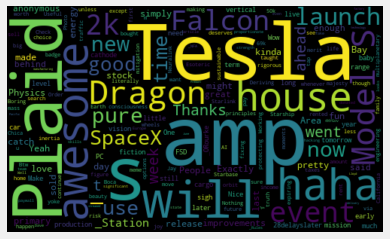

In [22]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Deriving moments of inertia from first princi...,0.333333,0.250000,Positive
1,Esoteric meme of the day,0.000000,0.000000,Neutral
2,Physics should be taught with the majesty &am...,0.000000,0.000000,Neutral
3,Physics is simply the search for truth. Nothi...,0.428571,0.250000,Positive
4,Jay is awesome!,1.000000,1.000000,Positive
...,...,...,...,...
95,: Falcon 9 and Dragon roll out to Launch Compl...,0.400000,-0.300000,Negative
96,Sounds kinda fun,0.200000,0.300000,Positive
97,OG Smartwatch,0.000000,0.000000,Neutral
98,"1 Yeah, new Model S &amp; X have PS5 level ent...",0.454545,0.136364,Positive


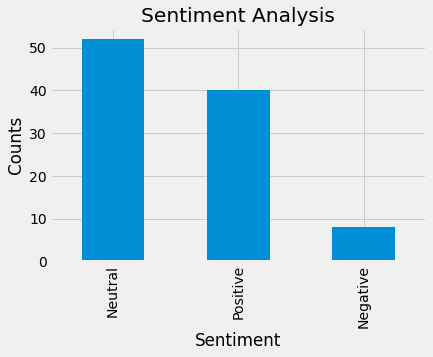

In [24]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()